<a href="https://colab.research.google.com/github/Dexduo/Metodos_Numericos_2/blob/main/Tarefa_1-2/MN2_tarefa1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
%matplotlib inline

np.set_printoptions(threshold=10)

In [97]:
path_to_img = "/content/drive/MyDrive/UFC - Universidade Federal do Ceará/CC - CIÊNCIA DA COMPUTAÇÃO/UFC CC 13º SEMESTRE/Métodos Numéricos 2/cobras_fumantes.jpg"
img = cv2.imread(path_to_img, cv2.IMREAD_GRAYSCALE)

In [98]:
print(img)

[[170 159 135 ...  48  55  61]
 [119 100  71 ...  44  50  56]
 [ 68  50  27 ...  45  51  56]
 ...
 [ 86  80  76 ... 122  97 112]
 [ 88  84  81 ... 108 105 154]
 [ 94  90  88 ... 105 132 189]]


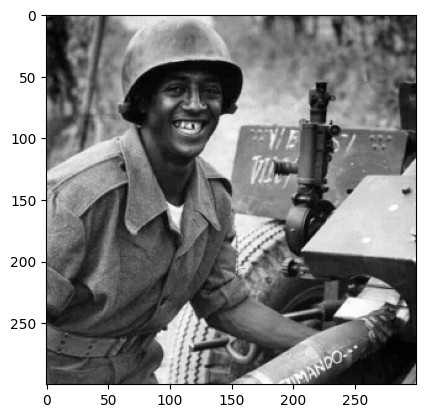

In [99]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

**Inserindo uma borda para a passagem correta do filtro 3x3**

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 170, 159, ...,  55,  61,   0],
       [  0, 119, 100, ...,  50,  56,   0],
       ...,
       [  0,  88,  84, ..., 105, 154,   0],
       [  0,  94,  90, ..., 132, 189,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
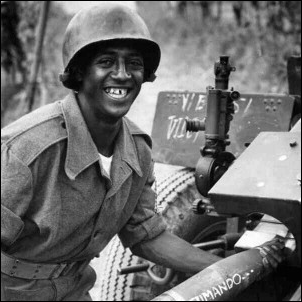

In [100]:
img = np.insert(img, 0, 0, axis=1)
img = np.insert(img, img.shape[1], 0, axis=1)
img = np.insert(img, 0, 0, axis=0)
img = np.insert(img, img.shape[0], 0, axis=0)
img

In [101]:
print(img)

[[  0   0   0 ...   0   0   0]
 [  0 170 159 ...  55  61   0]
 [  0 119 100 ...  50  56   0]
 ...
 [  0  88  84 ... 105 154   0]
 [  0  94  90 ... 132 189   0]
 [  0   0   0 ...   0   0   0]]


In [102]:
gaussian = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])

gaussian = gaussian.flatten() # na multiplicacao elemento por elemento o metodo multiply precisa
                              # que os arrays estejam em 1 dimensao

In [103]:
new_img = np.ndarray(shape=(300, 300), dtype=int)
new_img.fill(0)
new_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [104]:
for i in range(0, img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
  for j in range(0, img.shape[1]-2):
    piece_img = img[i:i+3, j:j+3]
    new_img[i-1][j-1] = round(np.sum(np.multiply(gaussian, piece_img.flatten()))/16) # divide por 16 pois é caracteristica do filtro gaussiano

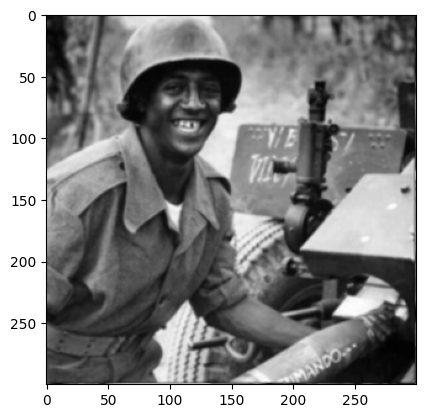

In [105]:
#f, axarr = plt.subplots(2)
#axarr[0].imshow(new_img, cmap='gray', vmin=0, vmax=255)
#axarr[1].imshow(img, cmap='gray', vmin=0, vmax=255)
#plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)

**Vamos agora aplicar o filtro gradiente que se divide em dois passos: aplicar filtro de sobel para direção x e depois filtro de sobel para a direção y**

In [106]:
sobel_x = np.array(
    [[1, 0, -1],
     [2, 0, -2],
     [1, 0, -1]]
)

sobel_x = sobel_x.flatten()

sobel_y = np.array(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]]
)

sobel_y = sobel_y.flatten()

img_sobel_x = np.ndarray(shape=(300, 300), dtype=int)
img_sobel_y = np.ndarray(shape=(300, 300), dtype=int)
img_sobel_x.fill(0)
img_sobel_y.fill(0)

In [107]:
for i in range(0, new_img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
  for j in range(0, new_img.shape[1]-2):
    piece_img = new_img[i:i+3, j:j+3]
    img_sobel_x[i-1][j-1] = round(np.sum(np.multiply(sobel_x, piece_img.flatten()))) #

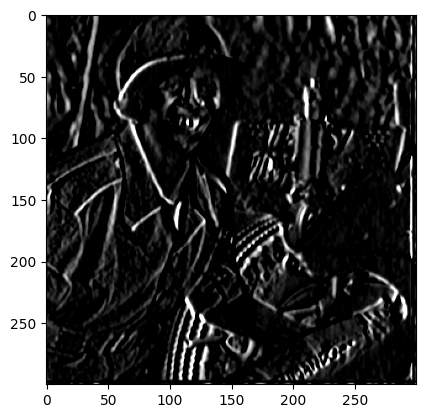

In [108]:
plt.imshow(img_sobel_x, cmap='gray', vmin=0, vmax=255)

In [109]:
for i in range(0, new_img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
  for j in range(0, new_img.shape[1]-2):
    piece_img = new_img[i:i+3, j:j+3]
    img_sobel_y[i-1][j-1] = round(np.sum(np.multiply(sobel_y, piece_img.flatten()))) #

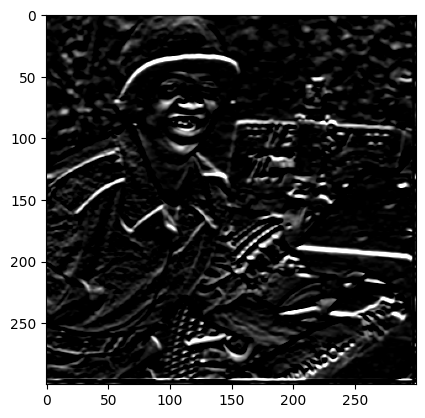

In [110]:
plt.imshow(img_sobel_y, cmap='gray', vmin=0, vmax=255)

In [111]:
img_sobel_x = img_sobel_x**2

img_sobel_y = img_sobel_y**2

img_final = np.add(img_sobel_x, img_sobel_y)

img_final = np.sqrt(img_final)

In [113]:
img_final = img_final.astype(int)

In [114]:
img_final

array([[ 47,  23,  26, ...,   0,   0,  98],
       [ 56,  44,  28, ...,   0,   0,  47],
       [103,  80,  46, ...,   0,   0, 115],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [195, 131,  92, ...,   0,   0, 271]])

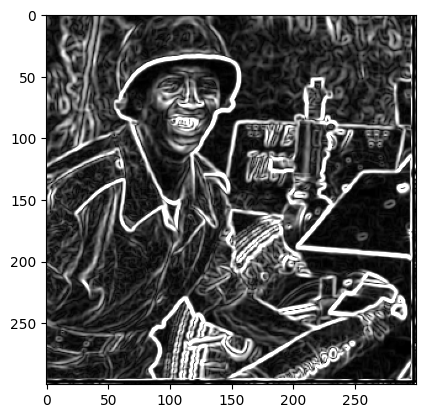

In [115]:
plt.imshow(img_final, cmap='gray', vmin=0, vmax=255)

In [146]:
img_filter = np.ndarray(shape=(300, 300), dtype=int)

for line in range(0, img_final.shape[0]):
  for column in range(0, img_final.shape[1]):
    if img_final[line][column] > 150:
      img_filter[line][column] = 255
    else:
      img_filter[line][column] = 0

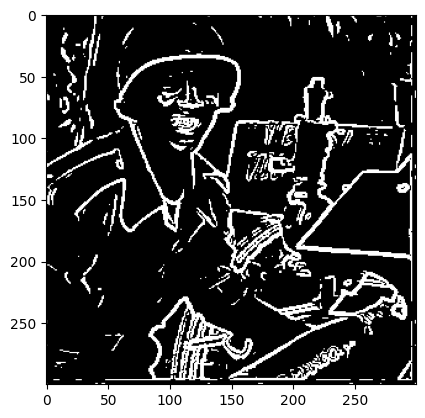

In [147]:
plt.imshow(img_filter, cmap='gray', vmin=0, vmax=255)